In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Date range
start = '2000-01-01'
end = '2023-05-24'

# Tickers of assets
assets = ['^KS200', '229200.KS', '143850.KS', '195930.KS', '238720.KS',
          '192090.KS', '148070.KS', '136340.KS', '182490.KS', '280940.KS',
          '130680.KS', '114800.KS', '138230.KS', '139660.KS', '130730.KS']

lables = ['KODEX 200',
    'TIGER 코스닥150',
    'TIGER 미국S&P500선물(H)',
    'TIGER 유로스탁스50(합성,H)',
    'ACE 일본Nikkei225(H)',
    'TIGER 차이나CSI300',
    'KOSEF 국고채10년',
    'KBSTAR 중기우량회사채(**)',
    'TIGER단기선진하이일드(합성, H)',
    'KODEX 골드선물(H)',
    'TIGER 원유선물Enhanced(H)',
    'KODEX 인버스',
    'KOSEF 미국달러선물',
    'KOSEF 미국달러인버스선물',
    'KOSEF 단기자금']

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  15 of 15 completed


In [2]:
pd.options.display.float_format = '{:.4f}'.format
data

,114800.KS,130680.KS,130730.KS,136340.KS,138230.KS,139660.KS,143850.KS,148070.KS,182490.KS,192090.KS,195930.KS,229200.KS,238720.KS,280940.KS,^KS200
Date,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.6600
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.8600
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.8000
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.1000
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,4675.0000,3890.0000,102720.0000,104575.0000,14435.0000,8870.0000,47500.0000,112450.0000,12110.0000,9870.0000,15190.0000,12640.0000,20505.0000,6570.0000,326.6100
2023-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.8400
2023-05-19,4570.0000,4015.0000,102730.0000,104445.0000,14345.0000,8935.0000,48555.0000,111655.0000,12110.0000,9720.0000,15460.0000,12650.0000,20990.0000,6630.0000,334.2300


In [3]:
# Calculating returns
Y = data[assets].pct_change().dropna()
Y.columns = lables
display(Y.head())

,KODEX 200,TIGER 코스닥150,TIGER 미국S&P500선물(H),"TIGER 유로스탁스50(합성,H)",ACE 일본Nikkei225(H),TIGER 차이나CSI300,KOSEF 국고채10년,KBSTAR 중기우량회사채(**),"TIGER단기선진하이일드(합성, H)",KODEX 골드선물(H),TIGER 원유선물Enhanced(H),KODEX 인버스,KOSEF 미국달러선물,KOSEF 미국달러인버스선물,KOSEF 단기자금
Date,,,,,,,,,,,,,,,
2017-11-10,0.0034,0.0036,-0.0000,-0.0000,0.0013,-0.0004,-0.0021,-0.0001,-0.0009,0.0165,-0.0096,0.0198,-0.0080,-0.0030,-0.0035
2017-11-13,0.0043,-0.0024,0.0000,-0.0010,0.0035,-0.0031,-0.0024,-0.0037,0.0000,0.0038,-0.0034,0.0400,-0.0139,0.0065,-0.0049
2017-11-14,0.0009,-0.0060,-0.0000,-0.0001,-0.0022,0.0022,-0.0011,-0.0012,-0.0036,-0.0038,-0.0080,0.0385,-0.0011,-0.0015,-0.0021
2017-11-15,0.0043,-0.0290,0.0001,0.0002,-0.0052,0.0045,-0.0008,0.0014,0.0005,-0.0135,-0.0077,0.0268,-0.0141,-0.0020,-0.0043
2017-11-16,-0.0051,0.0075,-0.0000,0.0007,-0.0096,0.0116,0.0000,0.0034,-0.0023,-0.0011,0.0043,0.0189,0.0126,0.0030,0.0066


In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'  # Use Arial font

In [19]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

c:\Users\indi\Desktop\Code\DBGAPS\dbgaps\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [20]:
print(mpl.get_cachedir())

C:\Users\indi\.matplotlib


'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


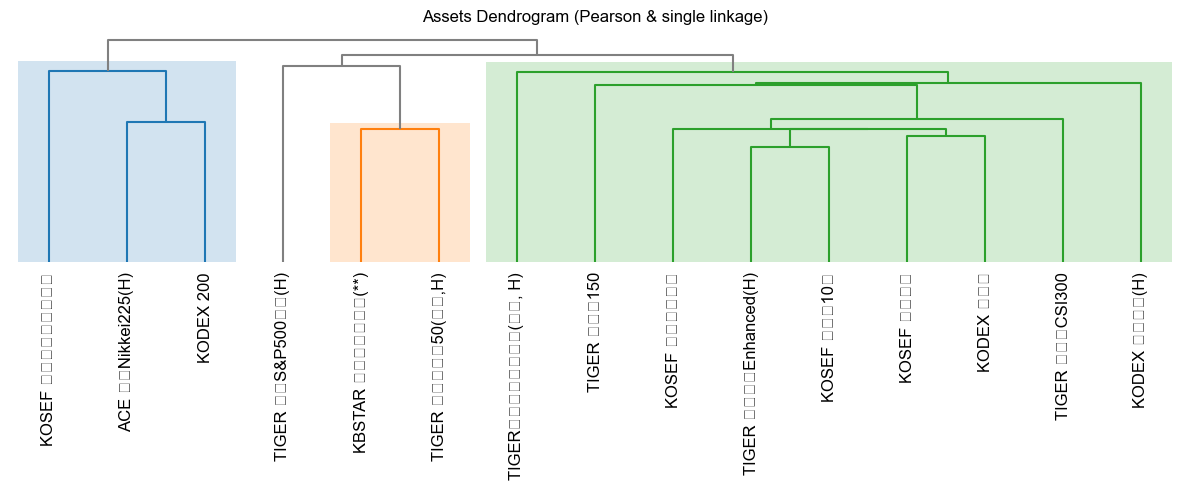

In [18]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=5,
                        leaf_order=True,
                        ax=None)

In [7]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,KODEX 200,TIGER 코스닥150,TIGER 미국S&P500선물(H),"TIGER 유로스탁스50(합성,H)",ACE 일본Nikkei225(H),TIGER 차이나CSI300,KOSEF 국고채10년,KBSTAR 중기우량회사채(**),"TIGER단기선진하이일드(합성, H)",KODEX 골드선물(H),TIGER 원유선물Enhanced(H),KODEX 인버스,KOSEF 미국달러선물,KOSEF 미국달러인버스선물,KOSEF 단기자금
weights,0.0017,0.0002,0.6083,0.3235,0.0089,0.0051,0.0006,0.0259,0.0183,0.0009,0.0005,0.0003,0.0008,0.0045,0.0007


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

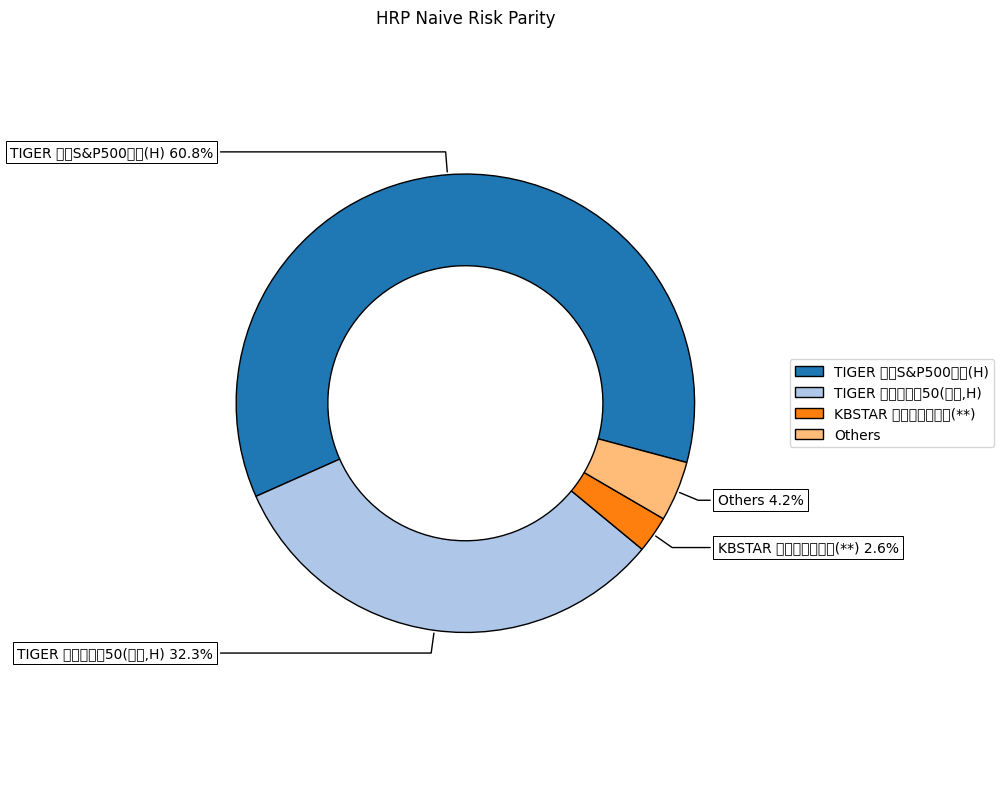

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

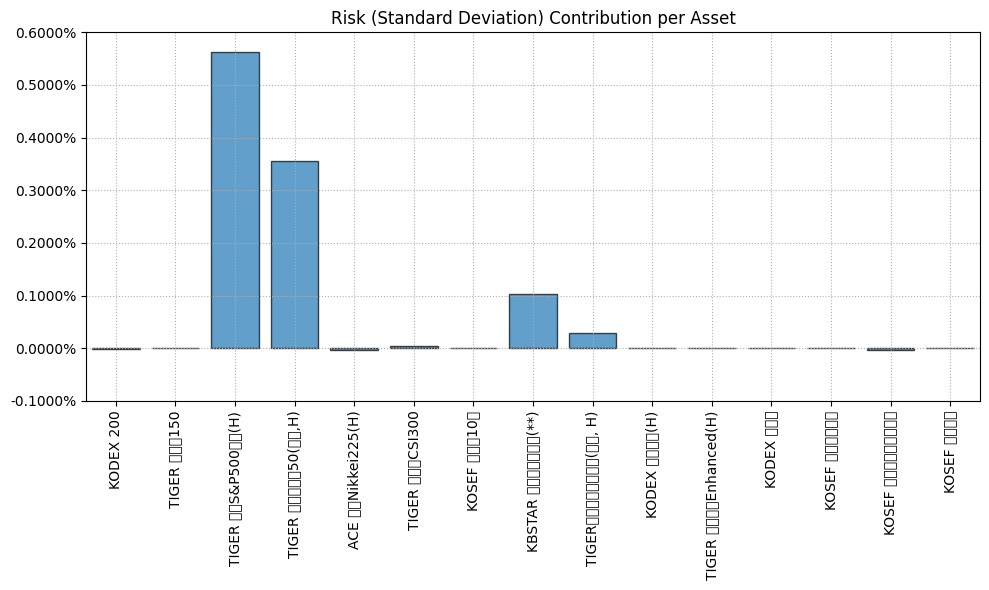

In [9]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [10]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'GMD': Gini Mean Difference.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'TG': Tail Gini.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax).
# 'RG': Range of returns.
# 'CVRG': CVaR Range of returns.
# 'TGRG': Tail Gini Range of returns.
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'GMD', 'MSV', 'FLPM', 'SLPM', 'VaR',
       'CVaR', 'TG', 'EVaR', 'WR', 'RG', 'CVRG', 'TGRG', 'MDD', 
       'ADD', 'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel',
       'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [11]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,GMD,MSV,FLPM,SLPM,VaR,CVaR,TG,EVaR,WR,RG,CVRG,TGRG,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
KODEX 200,2.08%,0.17%,1.04%,1.12%,2.46%,0.94%,2.42%,0.47%,2.21%,2.57%,2.20%,2.05%,2.02%,1.61%,1.91%,0.82%,0.60%,0.70%,0.75%,0.77%,0.63%,1.04%,0.69%,0.87%,0.95%,0.98%,0.75%
TIGER 코스닥150,0.64%,0.02%,0.35%,0.36%,0.67%,0.32%,0.67%,0.13%,0.53%,0.60%,0.54%,0.49%,0.49%,0.45%,0.51%,0.32%,0.64%,0.54%,0.42%,0.39%,0.61%,0.50%,0.70%,0.66%,0.55%,0.54%,0.70%
TIGER 미국S&P500선물(H),36.10%,60.83%,68.02%,66.66%,29.56%,69.99%,29.45%,87.95%,47.23%,36.91%,14.84%,14.24%,20.78%,56.51%,47.91%,61.25%,39.77%,55.42%,57.48%,58.57%,46.36%,58.49%,38.84%,53.50%,55.41%,56.28%,45.03%
"TIGER 유로스탁스50(합성,H)",27.37%,32.35%,13.52%,14.09%,29.46%,13.00%,29.83%,4.62%,20.84%,25.50%,40.58%,42.27%,41.36%,18.00%,21.93%,15.87%,25.82%,14.81%,14.40%,15.46%,21.06%,16.00%,26.33%,15.07%,14.72%,15.60%,21.45%
ACE 일본Nikkei225(H),4.84%,0.89%,2.39%,2.57%,5.53%,2.29%,5.61%,1.09%,4.96%,5.75%,5.05%,4.67%,4.46%,3.74%,4.47%,4.04%,4.10%,4.04%,4.12%,4.11%,4.28%,3.80%,3.76%,3.67%,3.81%,3.82%,3.93%
TIGER 차이나CSI300,3.13%,0.51%,1.55%,1.63%,3.56%,1.35%,3.44%,0.56%,2.72%,3.40%,5.17%,5.46%,3.61%,2.21%,2.65%,1.50%,1.10%,1.41%,1.53%,1.51%,1.34%,1.67%,1.30%,1.64%,1.72%,1.69%,1.52%
KOSEF 국고채10년,1.13%,0.06%,0.60%,0.61%,1.21%,0.57%,1.22%,0.22%,0.90%,1.06%,1.58%,1.72%,1.48%,0.76%,0.88%,0.92%,2.51%,1.70%,1.58%,1.28%,2.19%,1.17%,2.59%,1.89%,1.75%,1.50%,2.34%
KBSTAR 중기우량회사채(**),7.44%,2.59%,3.64%,3.69%,8.19%,3.36%,8.13%,1.52%,5.24%,6.13%,9.07%,8.93%,8.21%,4.47%,5.21%,3.73%,4.58%,4.38%,4.15%,4.05%,4.65%,3.96%,4.65%,4.52%,4.34%,4.24%,4.75%
"TIGER단기선진하이일드(합성, H)",6.50%,1.83%,3.44%,3.55%,7.25%,3.26%,7.29%,1.34%,5.77%,6.59%,6.61%,6.00%,5.84%,4.53%,5.27%,4.42%,11.82%,7.28%,6.50%,5.69%,9.39%,4.77%,11.75%,7.47%,6.71%,5.99%,9.47%
KODEX 골드선물(H),1.30%,0.09%,0.64%,0.67%,1.48%,0.59%,1.47%,0.25%,1.14%,1.39%,2.43%,2.84%,1.78%,0.90%,1.10%,1.26%,1.04%,1.18%,1.37%,1.35%,1.20%,1.44%,1.15%,1.40%,1.55%,1.52%,1.32%


<Axes: >

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

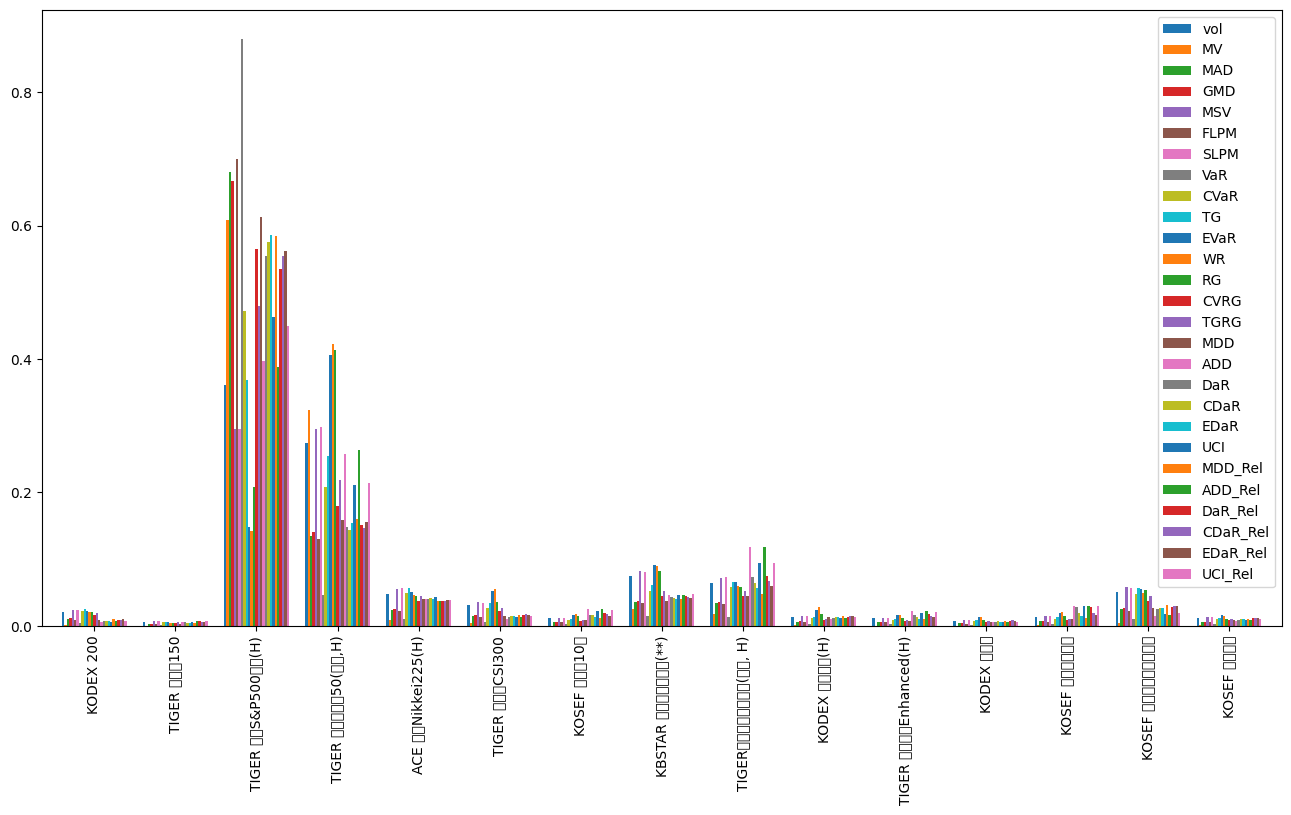

In [12]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot(kind='bar', width=0.8, ax=ax)